# 5. Capstone Project: Data Preparation I

***

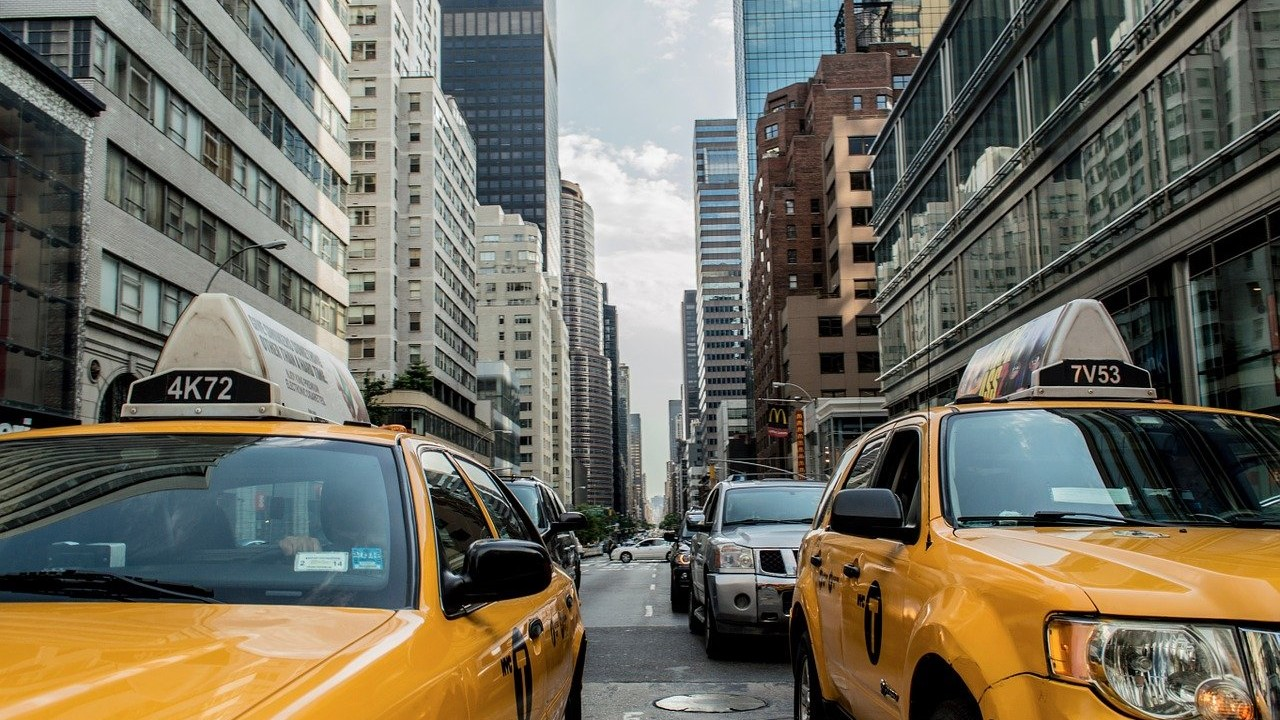

##  Goals

### Project:
Find out where and when traffic congestion is highest and lowest in New York City. Then build different machine learning models that can predict cab travel times in New York City, compare their performance, and explore the potential of additional features such as weather forecasts and holidays to improve the models' predictive performance.

### Section:
In this section, data will be prepared for the next steps, i.e., exploratory data analysis and machine learning model building. First, we will collect and import the necessary datasets. Next, we will review each of these datasets to fully understand the data and its structure, including the different variables available, their format, and their relevance to the project. Finally, we will perform data cleaning and manipulation, as well as feature engineering, and encoding.

The data preparation will be divided into two subsections, the first dedicated to the external datasets (Data Preparation Part I) and the second to the New York City Taxi Trip data set (Data Preparation Part II). Finally, external datasets will be merged with the primary one.

## Data
### External Datasets:
- Weather Forecast: The 2018 NYC weather forecast was collected from the [National Weather Service Forecast Office](https://w2.weather.gov/climate/index.php?wfo=okx) website. Daily measurements were taken from January to December 2018 in Central Park. These measures are given in imperial units and include daily minimum and maximum temperatures, precipitations, snowfall, and snow depth.

- Holidays: The 2018 NYC holidays list was collected from the [Office Holiday](https://www.officeholidays.com/countries/usa/new-york/2021) website. The dataset contains the name, date, and type of holidays for New York.

- Taxi Zones: The NYC Taxi Zones dataset was collected from the [NYC Open Data](https://data.cityofnewyork.us/Transportation/NYC-Taxi-Zones/d3c5-ddgc)website. It contains the pickup and drop-off zones (Location IDs) for the Yellow, Green, and FHV Trip Records. The taxi zones are based on the NYC Department of City Planning’s Neighborhood.

### Primary Datasets:

- Taxi Trips: The 2018 NYC Taxi Trip dataset was collected from the [Google Big Query](https://console.cloud.google.com/marketplace/product/city-of-new-york/nyc-tlc-trips?project=jovial-monument-300209&folder=&organizationId=) platform. The dataset contains more than 100'000'000 Yellow Taxi Trip records for 2018 and contains an extensive amount of variables including the pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

***

## Table of Content:
    1. Data Preparation
        1.1 External datasets
            1.1.1 Weather Forecast Dataset
            1.1.2 Holidays Dataset
            1.1.3 Taxi Zones Dataset
        1.2 Primary Dataset
            1.2.1 Taxi Trips Dataset
    2. Exploratory Data Analysis
    3. Machine Learning Models

    

***
## Python Libraries and Magic commands Import

In [1]:
# Import python core libraries
import itertools

# Import data processing libraris gpd
import pandas as pd
import geopandas as gpd
import numpy as np

# Import Visualization librairies
import seaborn as sns 
import matplotlib.pyplot as plt
import contextily as ctx

In [2]:
# Set up magic commands
%matplotlib inline

***
## Import Functions

In [3]:
# Define a function that transform column headers to titles
def to_title(data, sep='_'):
    return [s.replace(sep, ' ').title() for s in data]

In [4]:
# Define a function that display individual barplot 
def plot_barplot(data, x_var, y_var, x_label, y_label):
    # Create a figure with n columns and rows
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
        
    # Generate the plots
    ax.bar(data[x_var], data[y_var])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.yaxis.set_ticks_position('none')
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.grid()
    
    # Adjust the padding between and around subplots
    fig.tight_layout(pad=0.5, w_pad=0.5)
    
    # Display the figure
    plt.show()

In [5]:
# Define a function that display individual boxplot of selected numerical columns
def plot_boxplot(data, columns, colnames, ncols=1, nrows=1):

    # Define the fliers props
    flierprops = dict(markerfacecolor="C0", markersize=5, markeredgecolor="none")

    # Create a figure with n columns and rows
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 5, nrows * 5))

    # Flatten axes for 2D figures
    if ncols > 1 and nrows > 1:
        axes = axes.ravel()

    # Generate the plots
    for ax, col, colname in zip(axes, columns, colnames):
        ax.boxplot(data[col], flierprops=flierprops)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_visible(False)
        ax.yaxis.set_ticks_position("none")
        ax.set_xlabel(colname)
        ax.set_title(colname + " Distribution")
        ax.grid()

    # Adjust the padding between and around subplots
    fig.tight_layout(pad=0.5, w_pad=0.5)

    # Display the figure
    plt.show()

In [6]:
# Define a function that display individual violinplot of selected numerical columns
def plot_violinplot(data, columns, colnames, ncols=1, nrows=1, palette="Set2"):

    # Define the color palette
    cpal = itertools.cycle(sns.color_palette(palette))

    # Create a figure with n columns and rows
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 5, nrows * 5))

    # Flatten axes for 2D figures
    if ncols > 1 and nrows > 1:
        axes = axes.ravel()

    # Generate the plots
    for ax, col, colname in zip(axes, columns, colnames):
        violin_plot = ax.violinplot(data[col])

        # Change color of the violin plot
        for pc, color in zip(violin_plot["bodies"], cpal):
            pc.set_facecolor(color)
            pc.set_edgecolor(color)

        violin_plot["cbars"].set_edgecolor("black")
        violin_plot["cmins"].set_edgecolor("black")
        violin_plot["cmaxes"].set_edgecolor("black")

        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_visible(False)
        ax.yaxis.set_ticks_position("none")
        ax.set_title(colname)
        ax.grid()

    # Adjust the padding between and around subplots
    fig.tight_layout(pad=0.5, w_pad=0.5)

    # Display the figure
    plt.show()

In [7]:
# Define a function that display individual lineplot of selected numerical columns
def plot_lineplot(data, variable, columns, colnames, ncols=1, nrows=1, palette="Set2"):

    # Define the color palette
    cpal = itertools.cycle(sns.color_palette(palette))

    # Create a figure with n columns and rows
    fig, axes = plt.subplots(
        sharex=True, nrows=nrows, ncols=ncols, figsize=(20, nrows * 5)
    )

    # Flatten axes for 2D figures
    if ncols > 1 and nrows > 1:
        axes = axes.ravel()

    # Generate the plots
    for ax, col, colname, colour in zip(axes, columns, colnames, cpal):
        ax.plot(data[variable], data[col], color=colour)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_visible(False)
        ax.yaxis.set_ticks_position("none")
        ax.set_ylabel(colname)
        ax.grid()

    # Adjust the padding between and around subplots
    fig.tight_layout(pad=0.5, w_pad=0.5)

    # Display the figure
    plt.show()

***

## 1.1.1 Data Preparation: Weather Forecasts Dataset
### Goal:
Explore the 2018 NYC Weather Forecasts dataset and perform data cleaning and manipulation, as well as feature engineering and encoding if needed.
### Code:

In [8]:
# Get the 2018 weather weather forecast in NYC from the offical
weather_df = pd.read_csv(r'data/raw/weather.csv', parse_dates=['Date'])

# Rename the date column
weather_df.rename({'Date': 'date'}, axis=1, inplace=True)

# Dispaly the first five rows of the data frame
weather_df.head()

,date,max_temp,min_temp,avg_temp,dep_temp,hdd,cdd,prec,new_snow,snow_depth
0,2018-01-01,19,7,13.0,-22.2,52,0,0,0,T
1,2018-01-02,26,13,19.5,-15.5,45,0,0,0,0
2,2018-01-03,30,16,23.0,-11.8,42,0,0,0,T
3,2018-01-04,29,19,24.0,-10.7,41,0,0.76,9.8,1
4,2018-01-05,19,9,14.0,-20.5,51,0,0,0,7


In [9]:
# Display a quick description of the data frame
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        365 non-null    datetime64[ns]
 1   max_temp    365 non-null    int64         
 2   min_temp    365 non-null    int64         
 3   avg_temp    365 non-null    float64       
 4   dep_temp    365 non-null    float64       
 5   hdd         365 non-null    int64         
 6   cdd         365 non-null    int64         
 7   prec        365 non-null    object        
 8   new_snow    365 non-null    object        
 9   snow_depth  365 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 28.6+ KB


**Observations:** the dataset contains 0 null values. However, the prec, new_snow, and snow_depth columns contain objects or strings yet should only contain numbers (i.e., floats or integers). Getting a list of the columns' unique values will help us identify the problematic entries.

In [10]:
# Display the unique vlaues from the snow_depth column
print('snow_depth:', weather_df['snow_depth'].unique())

# Display the unique values from the new_snow column
print('new_snow:', weather_df['new_snow'].unique())

# Display the unique values from the prec column
print('prec:', weather_df['prec'].unique())

snow_depth: ['T' '0' '1' '7' '6' '5' '4' '3' '2' '8']
new_snow: ['0' '9.8' 'T' '0.4' '0.1' '0.9' '0.5' '4.4' '3.2' '8.2' '0.2' '5.5' '6.4']
prec: ['0' '0.76' '0.01' '0.54' '0.05' '0.19' '0.3' '0.21' 'T' '0.11' '0.18'
 '0.96' '0.85' '0.58' '1.21' '0.08' '0.16' '0.09' '0.52' '0.04' '0.06'
 '0.17' '0.73' '0.38' '1.86' '1.41' '0.28' '0.99' '0.03' '0.59' '0.26'
 '0.47' '2.82' '0.15' '0.95' '0.1' '0.02' '0.25' '0.22' '0.34' '0.65'
 '0.29' '0.44' '0.27' '0.07' '1.36' '0.23' '0.71' '0.36' '0.64' '2.24'
 '0.63' '1.06' '0.37' '0.51' '0.24' '0.74' '0.61' '2.9' '0.66' '0.79'
 '1.04' '0.72' '0.45' '0.93' '0.13' '1.19' '1.95' '0.77' '0.69' '0.84'
 '0.43' '1.27' '0.68' '1.16' '0.31' '0.97' '0.81' '0.14' '1.43' '1.61'
 '0.12' '1.15' '1.02']


**Obsverations:** the snpw_depth, new_snow, and perc columns may contain the T character. According to the National Weather Service Forecast Office, this character stands for trace amounts. Hence we will replace this value with 0 and convert the content of these columns to float. Additionally, we will also get rid of a few columns containing data not needed to train our future models.

In [11]:
# Replace Ts by 0
weather_df.replace('T', 0, inplace = True)

# Gather columns to be convert to float16
float_columns = ['avg_temp', 'prec', 'new_snow', 'snow_depth']

# Convert string columns to float
weather_df[float_columns] = weather_df[float_columns].astype(float)

# Round numerical columns to one decimals
weather_df = weather_df.round(1)

# Drop non-essential columns
weather_df = weather_df[['date', 'avg_temp', 'prec', 'new_snow', 'snow_depth']]

# Display a quick description of the data frame
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        365 non-null    datetime64[ns]
 1   avg_temp    365 non-null    float64       
 2   prec        365 non-null    float64       
 3   new_snow    365 non-null    float64       
 4   snow_depth  365 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 14.4 KB


**Observations:** The T characters were correctly converted to zeros and the columns to float.

In [12]:
# Display some descriptive statistics
weather_df.describe()

,avg_temp,prec,new_snow,snow_depth
count,365.000000,365.000000,365.000000,365.000000
mean,55.953425,0.177534,0.108493,0.178082
std,17.724324,0.401699,0.846881,0.933834
min,9.500000,0.000000,0.000000,0.000000
25%,41.000000,0.000000,0.000000,0.000000
50%,54.000000,0.000000,0.000000,0.000000
75%,73.000000,0.100000,0.000000,0.000000
max,87.500000,2.900000,9.800000,8.000000


**Notes:** Numerical values such as temperature, precipitation and snow depth are given in imperial units. Converting them to metric units is not strictly necessary but can help spot uncommon and outlying values. We will thus convert temperatures to degrees Celsius and depths to centimeters.

In [13]:
# Convert temperature from fahrenheit to celcius
weather_df['avg_temp'] = (weather_df['avg_temp'] - 32) / 1.8

# Convert inches of snow to centimeters
weather_df['new_snow'] = weather_df['new_snow'] * 2.54

# Display some descriptive statistics
weather_df.describe()

,avg_temp,prec,new_snow,snow_depth
count,365.000000,365.000000,365.000000,365.000000
mean,13.307458,0.177534,0.275573,0.178082
std,9.846847,0.401699,2.151078,0.933834
min,-12.500000,0.000000,0.000000,0.000000
25%,5.000000,0.000000,0.000000,0.000000
50%,12.222222,0.000000,0.000000,0.000000
75%,22.777778,0.100000,0.000000,0.000000
max,30.833333,2.900000,24.892000,8.000000


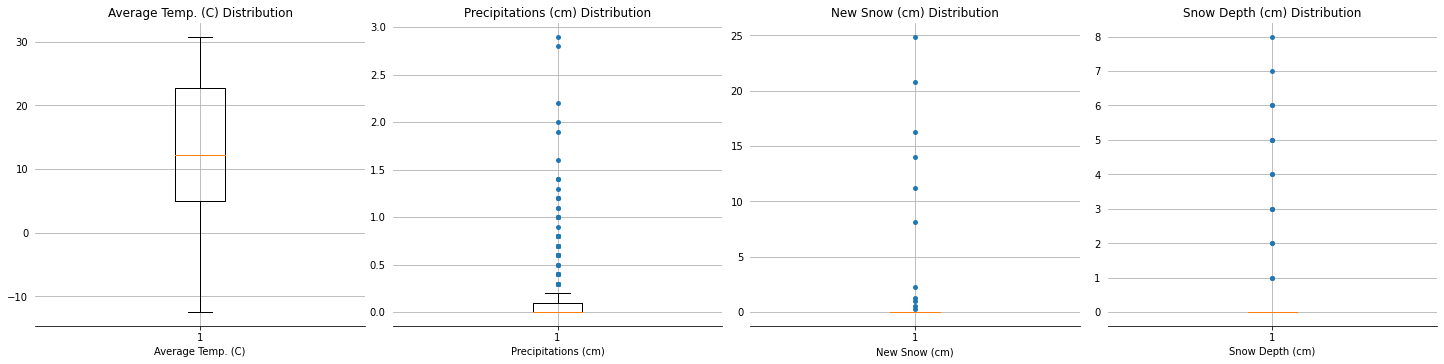

In [14]:
# Define the numerical columns
weather_cols = ['avg_temp',	'prec', 'new_snow', 'snow_depth']

# Define the name sof the columns
weather_colnames = ['Average Temp. (C)', 'Precipitations (cm)', 'New Snow (cm)', 'Snow Depth (cm)']

# Display boxplots of numerical columns
plot_boxplot(weather_df, weather_cols, weather_colnames, ncols=4)

**Observations:** The numeric columns have been correctly converted to metric units. The weather data set contains outliers but no incorrect values. These outliers will not be removed because they are simply natural events that occur less frequently.

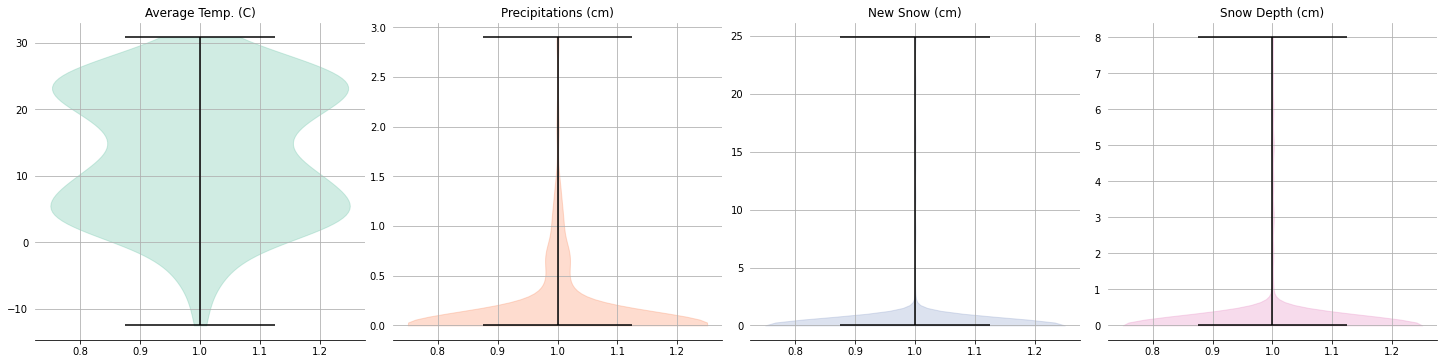

In [15]:
# Display violinplots of numerical columns
plot_violinplot(weather_df, weather_cols, weather_colnames, ncols=4)

**Observations:** As mentioned above, precipitation and snowfall are less frequent events with values mostly around zero. Snowfall is expected to occur only during the cold season, generally from October to March, while rainy days can occur at any time of the year. The temperatures follow a binomial distribution with a peak around 5 degrees and another around 25 degrees. These two peaks are likely corresponding to the average summer and winter temperatures.

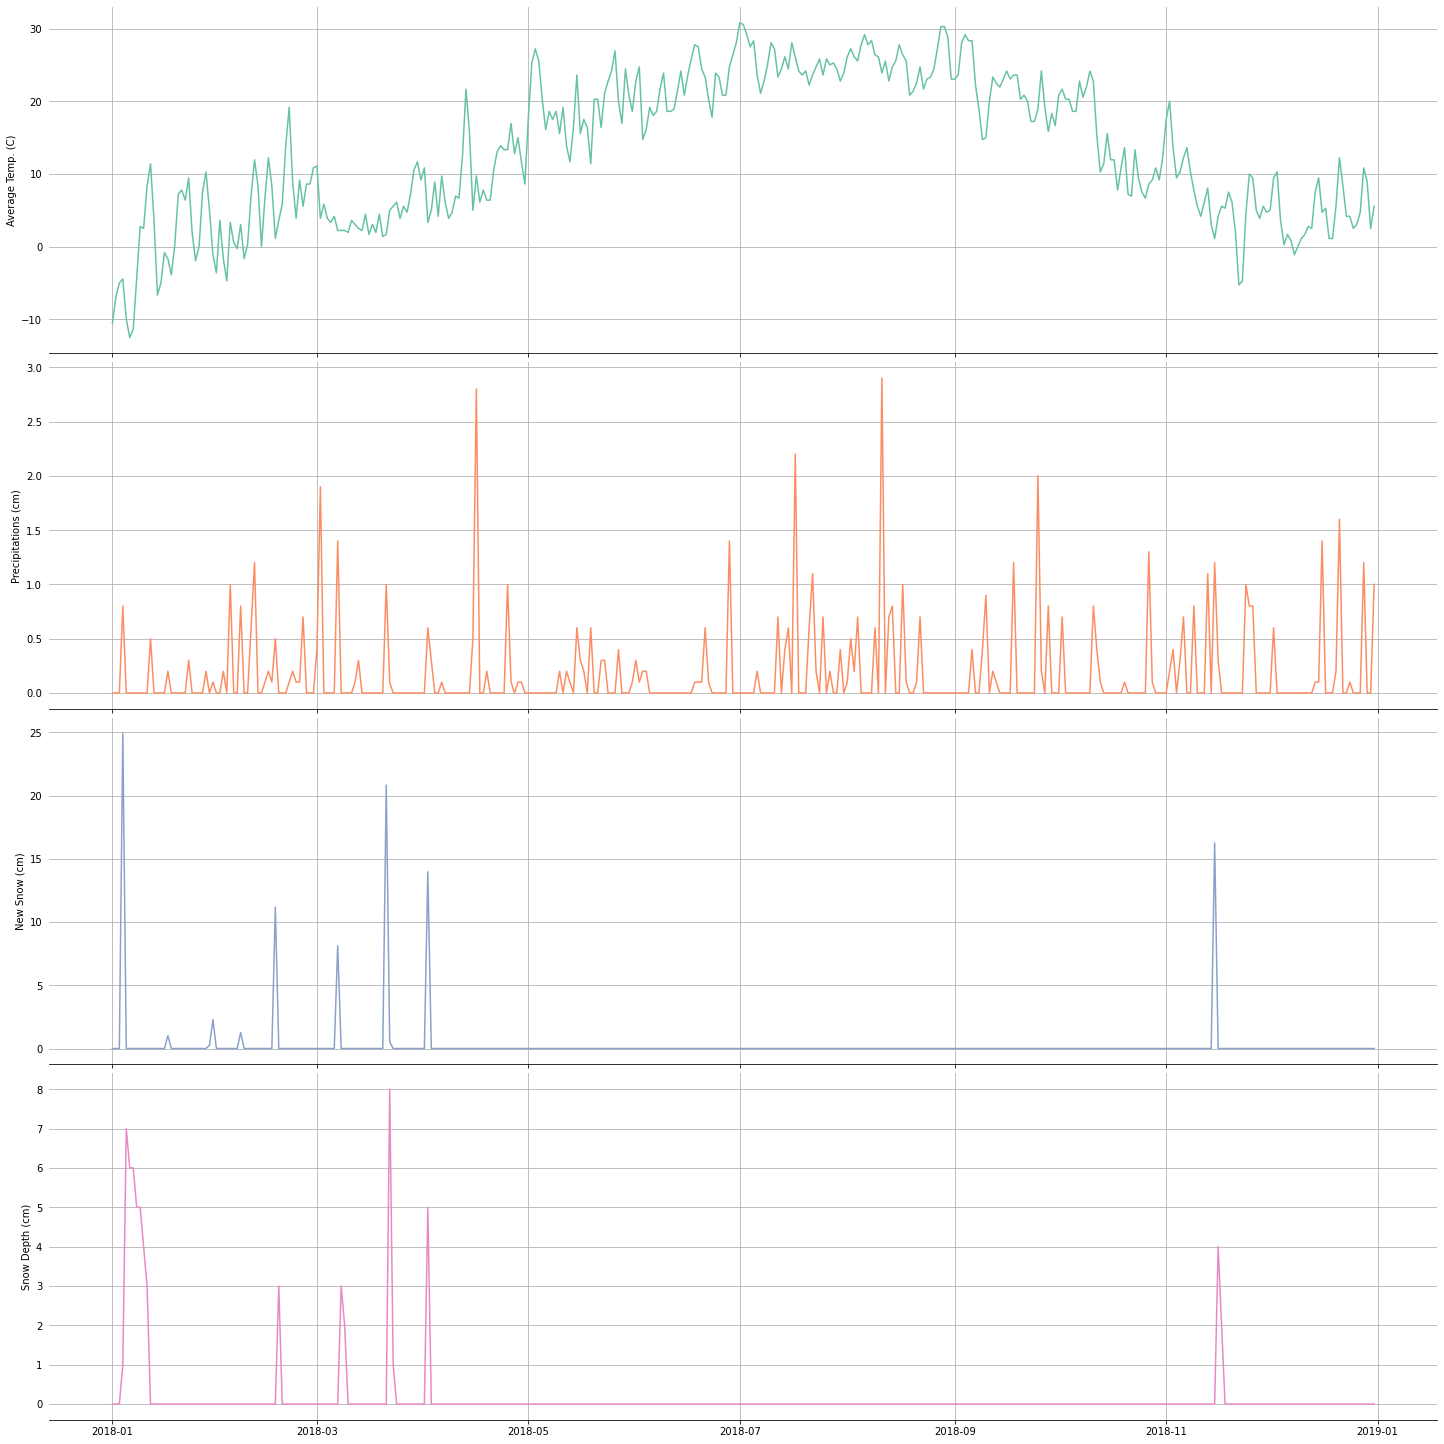

In [16]:
# Display lineplots of numerical columns
plot_lineplot(weather_df, 'date', weather_cols, weather_colnames, nrows=4)

**Observations:** As expected, snowfall is mainly observed in winter and during the shoulder season, while rainy days are much more frequent and present all year round. High temperatures are mainly observed in summer and are around 25 degrees, while low temperatures are mainly observed in winter with an average of around 5 degrees.

In [ ]:
# Partition average temperatures into 4 bins
weather_df["avg_temp"] = pd.cut(
    weather_df["avg_temp"], bins=4, labels=np.arange(4), right=False
)

# Partition precipitations into 4 bins
weather_df.loc[weather_df["prec"] > 0, "prec"] = pd.cut(
    weather_df["prec"], bins=4, labels=np.arange(4), right=False
)

# Partition new snows into 4 bins
weather_df["new_snow"] = pd.cut(
    weather_df["new_snow"], bins=4, labels=np.arange(4), right=False
)

# Partition snow depths into 4 bins
weather_df["snow_depth"] = pd.cut(
    weather_df["snow_depth"], bins=[4,8], labels=np.arange(1,3), right=False
)

# Display the first five rows of the data frame
weather_df.head()

In [ ]:
# Display lineplots of numerical columns
plot_lineplot(weather_df, 'date', weather_cols, weather_colnames, nrows=4)

**Obervations:** still capture general trend !!!!!!!!!!!!!!!!!!!!!

## 1.2 Data Preparation: Holidays Dataset
### Goal:
Combined and explore the 2018 NYC Holidays datasets. Data cleaning and manipulation, as well as feature engineering and encoding will also be performed if needed.
### Code:

In [ ]:
# Get the 2018school  holiday in NYC 
school_holidays_df = pd.read_csv(r'data/raw/school_holidays.csv')

# Display the first five rows of the data frame
school_holidays_df.head()

In [ ]:
# Display a quick description of the data frame
school_holidays_df.info()

**Observations:** The data frames contains 27 rows and three columns, including the Month, the Day of the month, and the name of the holiday. There are no missing values. We will first convert the Month and day to DateTime. Then we will add a column showing the type of holidays. Finally, we will drop most columns, except the date and type, as they are the only ones susceptible to provide information helping with the training of our models.

In [ ]:
# Add a date column from the year, month and day
school_holidays_df['Date'] = school_holidays_df.agg(lambda x: f"2018-{x['Month']}-{x['Day']}", axis=1)

# Convert the date from string to datetime
school_holidays_df['Date'] = pd.to_datetime(school_holidays_df['Date'], format='%Y-%B-%d')

# Display the first five rows of the data frame
school_holidays_df.head()

**Observations:** The dates were correctly transformed into a Year-Month-Day format.

In [ ]:
# Add a column containin the type of holidays
school_holidays_df['Type'] = 'School Holiday'

# Drop non-essential columns
school_holidays_df = school_holidays_df[['Date', 'Type']]

# Rename columns to fit their content
school_holidays_df.rename({'Date':'holiday_date', 'Type':'holiday_type'}, axis=1, inplace=True)

# Display the first five rows of the data frame
school_holidays_df.head()

**Observations:** The school holidays data frame has been correctly formated and will later be merged with the official holidays.

In [ ]:
# Get the 2018 official holiday in NYC 
official_holidays_df = pd.read_csv(r'data/raw/official_holidays.csv')

# Display the first five rows of the data frame
official_holidays_df.head()

In [ ]:
# Display a quick description of the data frame
official_holidays_df.info()

**Observations:** The data frames contains 16 rows and five columns, including the date, the name, and the type of the holiday. There are missing values in the comments columns. The date column includes only the month and day. We will first convert the date from string to DateTime. Then we will rank the holidays based on their national importance. Finally, we will drop most columns, except the date and type, as they are the only ones susceptible to provide information helping with the training of our models.

In [ ]:
# Add the missing year in the date column
official_holidays_df['Date'] = official_holidays_df['Date'] + '-2018'

# Convert the date from string to datetime
official_holidays_df['Date'] = pd.to_datetime(official_holidays_df['Date'])

# Display the first five rows of the data frame
official_holidays_df.head()

**Observations:** The dates were correctly transformed into a Year-Month-Day format.

In [ ]:
# Drop non-essential columns
official_holidays_df = official_holidays_df[['Date', 'Type']]

# Rename columns to fit their content
official_holidays_df.rename({'Date':'holiday_date', 'Type':'holiday_type'}, axis=1, inplace=True)

# Display the first five rows of the data frame
official_holidays_df.head()

**Observations:** The official holidays data frame has been correctly formated and can now be merged with the school holidays.

In [ ]:
# Merged the school and offical holidays data frame
holidays_df = school_holidays_df.append(official_holidays_df, ignore_index=True)

# Sort the data frame by date
holidays_df.sort_values('holiday_date', inplace=True)

# Display the first five rows of the data frame
holidays_df.head()

In [ ]:
# Display the unique type of holidays
holidays_df['holiday_type'].unique().tolist()

**Observations:** There are four type of holidays: Federal Holiday, Government Holiday, School Holiday and Not A Public Holiday. Government holidays will be ranked the highest and Not-public holidays the lowest.

In [ ]:
# Rank official holidays
holidays_df["holiday_type"] = holidays_df["holiday_type"].replace(
    {
        "Federal Holiday": 3,
        "Government Holiday": 2,
        "School Holiday": 1,
        "Not A Public Holiday": 0,
    }
)

# Display the first five rows of the data frame
holidays_df.head()

**Observations:** some days can be both a school and an official holiday. In this case, we will keep only the highest type of holiday.

In [ ]:
# Sort the data frame by date
holidays_df.sort_values(['holiday_date', 'holiday_type'], inplace=True)

# Discard duplicated holidays while keeping the highest holidays type
holidays_df.drop_duplicates('holiday_date', keep='last', inplace=True)

# Display the first five rows of the data frame
holidays_df.head()

**Observations:** the final step is to add an additional column to the data frame that will contain a 1 to indicate that these dates are not regular days.

In [ ]:
#  Add a column containing ones to indicates that these dates corresponds to holidays
holidays_df['holiday'] = 1

# Display the first five rows of the data frame
holidays_df.head()

**Observations:** the holiday dataset is now ready to be used and explored.

In [ ]:
# Generate dates from the 1st of January to the 31st of December 2018
date_range = pd.date_range(start='2018-01-01', end='2018-12-31')

# Create an empty data frame containin the dates
year_holidays_df = pd.DataFrame({'date':date_range})

# Merge the year holidays data frame with the holiday one
year_holidays_df = year_holidays_df.merge(holidays_df,  how='left', left_on='date', right_on='holiday_date', suffixes=(None, None))

# Discard uncessary columns
year_holidays_df = year_holidays_df[['date', 'holiday']]

# Fill NaN from the holiday column with zeros
year_holidays_df = year_holidays_df.fillna(0)

# Display the first five rows of the data frame
year_holidays_df.head()

In [ ]:
# Compute the sum of monthly holidays
year_holidays_df_gp = year_holidays_df.groupby(pd.Grouper(key='date', freq='M')).sum().reset_index()

# Add a month column to the data frame
year_holidays_df_gp['month'] = year_holidays_df_gp['date'].dt.month

# Display a barplot of the number of monthly holidays
plot_barplot(year_holidays_df_gp, 'month', 'holiday', 'Month of Year', 'Holidays Count')

**Observations**: March and December are the two months with the highest number of holidays. We will see later if the number of monthly vacations can affect traffic in NYC.

## 1.1.3 Data Preparation: Zones Dataset
### Goals:
Explore the NYC Taxi Zones dataset and perform data cleaning and manipulation, as well as feature engineering and encoding if needed.
### Code:

In [ ]:
# Import the official NYC taxi zones
zones_df = gpd.read_file(r'data/raw/taxi_zones_shapefile').to_crs(epsg=3857)

# Display the first five rows of the data frame
zones_df.head()

In [ ]:
# Display a quick description of the data frame
zones_df.info()

In [ ]:
# Get the unique values from the zone column
nyc_zones = sorted(zones_df['zone'].unique())

# Get the unique values from the borough column
nyc_boroughs = sorted(zones_df['borough'].unique())

# Display the number of zones dans boroughs
print(f'There are a total of {len(nyc_zones)} zones distributed in {len(nyc_boroughs)} boroughs in NYC including:')

# Display the name of the Boroughs
for name in nyc_boroughs:
    print(f'- {name}')

In [ ]:
# Creat a figure with one row and one column
fig, axe = plt.subplots(figsize=(10, 10))

# Generate the map
zones_df.plot(
    column="borough", ax=axe, alpha=0.33, cmap="Spectral", edgecolor="k", legend=True
)

# Add a base map of New York City
ctx.add_basemap(axe, source=ctx.providers.Stamen.TonerLite)

# Define the title of the map
axe.set_title("NYC Boroughs", fontsize=20)

# Remove axes
axe.set_axis_off()

# Display the plot
plt.show()

In [ ]:
# Create a figure with one row and one column
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))

# Generate the map
for ax, borough in zip(axes.flatten(), nyc_boroughs):
    borough_df = zones_df.loc[zones_df.borough == borough]
    borough_df.plot(column='zone', cmap='Spectral', ax=ax, alpha=0.33, edgecolor='grey')
    ax.set_title(f'{borough}: {len(borough_df.zone.unique())} zones')
    ax.set_axis_off()
    
    # Add a base map of New York City
    ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)

# Define the title of the plot
fig.suptitle('NYC Zones', fontsize=20)

# Adjust the padding between and around subplots
fig.tight_layout(pad=0.5, w_pad=0.5)

# Display the figure
plt.show()

In [ ]:
# Get a list of unique boroughs
boroughs = zones_df["borough"].unique()

# Create a new column containing boroughs id
zones_df["BoroughID"] = zones_df["borough"].map(
    dict(zip(boroughs, range(0, len(boroughs))))
)

# Display the first five rows of the data frame
zones_df.head()

***
## Data Export

In [ ]:
# Export the weather forecasts dataset
weather_df.to_pickle(r'data/processed/weather.pickle')

# Export the holidays dataset
holidays_df.to_pickle(r'data/processed/holidays.pickle')

# Export the zones dataset
zones_df.to_pickle(r'data/processed/zones.pickle')